In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [1]:
import torch

In [2]:
import numpy as np
import os
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf
import tensorflow as tf
from dopamine.agents.dqn import dqn_agent

2021-10-05 14:43:33.105078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 14:43:33.105108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
BASE_PATH = '/home/diegobalam/Fake_news/tmp/fisrt_dqn_test/'  # @param

In [4]:
# @title Load the configuration for DQN.
DQN_PATH = os.path.join(BASE_PATH, 'dqn3')
# Modified from dopamine/agents/dqn/config/dqn_cartpole.gin
dqn_config = """
# Hyperparameters for a simple DQN-style Cartpole agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import gin.tf.external_configurables
import fake_gym
import testConfiguration
import tensorflow


DQNAgent.observation_shape = (1538,1)
DQNAgent.observation_dtype = %diaspora.OBSERVATION_DTYPE
DQNAgent.stack_size = 1
DQNAgent.network = @testConfiguration.diaspora_dqn_network
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 500
DQNAgent.update_period = 4
DQNAgent.target_update_period = 100
DQNAgent.epsilon_fn = @dqn_agent.identity_epsilon
DQNAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
DQNAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'gym_fake'
create_gym_environment.version = 'v0'
create_agent.agent_name = 'dqn'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 4
Runner.training_steps = 4
Runner.evaluation_steps = 4
Runner.max_steps_per_episode = 4  # Default max episode length.

WrappedReplayBuffer.replay_capacity = 10
WrappedReplayBuffer.batch_size = 2
"""
gin.parse_config(dqn_config, skip_unknown=False)

ModuleNotFoundError: No module named 'fake_gym'
  In bindings string line 9
    import fake_gym

In [9]:
# @title Train DQN on Cartpole
dqn_runner = run_experiment.create_runner(DQN_PATH, schedule='continuous_train')
print('Will train DQN agent, please be patient, may be a while...')

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


Downloading:   0%|          | 0.00/852 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:155: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  f'`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="{aggregation_strategy}"` instead.'
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:0
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7fbc7ea1a110>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (1024, 1)
INFO:absl:	 observation_dtype: <class 'numpy.float64'>
INFO:absl:	 terminal_dtype: <class 'numpy.uint8'>
INFO:absl:	 stack_size: 1
INFO:absl:	 replay_capacity: 10
INFO:absl:	 batch_size: 2
INFO:absl:	 update_horizon: 1
INFO:absl:	 gamma: 0.990000
INFO:absl:legacy_checkpoint_load: False


Will train DQN agent, please be patient, may be a while...


In [10]:
dqn_runner.run_experiment()
print('Done training!')

INFO:absl:Beginning training...


datos get
[[], [], []]
[[], [], []]
[0, 0, 0]
0.0
[[[], [], []], [[], [], []]]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], []]]
-0.1
datos get
[[], [], []]
[[], [], []]
[0, 0, 0]
0.0
[[[], [], []], [[], [], []]]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], []]]
-0.1
datos get
[[], [], []]
[[], [], []]
[0, 0, 0]
0.0
[[[], [], []], [[], [], []]]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], []]]
-0.1
datos get
[[], [], []]
[[], [], []]
[0, 0, 0]
0.0
[[[], [], []], [[], [], []]]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], []]]
-0.1


INFO:absl:Average undiscounted return per training episode: -0.40
INFO:absl:Average training steps per second: 0.70
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


datos get
['Columbia SIPA', [], []]
['2018', [], []]
[0.2951259, 0, 0]
-0.09837530056635539
[[[], [], []], [[], [], []]]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], []]]
-0.19837530056635538
datos get
['Columbia SIPA', [], []]
['2018', [], []]
[0.2951259, 0, 0]
-0.09837530056635539
[[[], [], []], [[], [], '2018']]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], '2018']]
-0.19837530056635538
datos get
['Columbia SIPA', [], []]
['2018', [], []]
[0.2951259, 0, 0]
-0.09837530056635539
[[[], [], []], [[], [], '2018']]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], '2018']]
-0.19837530056635538
datos get
['Columbia SIPA', [], []]
['2018', [], []]
[0.2951259, 0, 0]
-0.09837530056635539
[[[], [], []], [[], [], '2018']]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], '2018']]
-0.19837530056635538


INFO:absl:Average undiscounted return per training episode: -0.79
INFO:absl:Average training steps per second: 0.73


datos get
['The City College of New York', [], []]
[[], [], []]
[0.31751725, 0, 0]
-0.10583908359209697
[[[], [], []], [[], [], []]]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], []]]
-0.20583908359209696
datos get
['The City College of New York', [], []]
[[], [], []]
[0.31751725, 0, 0]
0.10583908359209697
[[[], [], []], [[], [], []]]
[0, 0.31751725, 0]
[0, 0.31751725, 0]
[[[], [], []], [[], [], []]]
0.005839083592096964
datos get
['The City College of New York', [], []]
[[], [], []]
[0.31751725, 0, 0]
0.0
[[[], [], []], [[], [], []]]
[0, 0.31751725, 0]
[0, 0.31751725, 0]
[[[], [], []], [[], [], []]]
-0.1
datos get
['City University of New York', 'A', []]
[[], [], []]
[0.40919116, 0.40919116, 0]
0.16695502400398254
[[[], 'A', 'A'], [[], [], []]]
[0, 0.40919116, 0.40919116]
[0, 0.40919116, 0.40919116]
[[[], 'A', 'A'], [[], [], []]]
0.06695502400398254


INFO:absl:Average undiscounted return per training episode: -0.23
INFO:absl:Average training steps per second: 0.77


datos get
['cia', 'LICENCIADO EN BIOLOGIA', []]
[[], [], []]
[0.19716357, 0.19716357, 0]
-0.13144237796465555
[[[], [], []], [[], [], []]]
[0, 0, 0]
[0, 0, 0]
[[[], [], []], [[], [], []]]
-0.23144237796465555
datos get
['cia', 'LICENCIADO EN BIOLOGIA', []]
[[], [], []]
[0.19716357, 0.19716357, 0]
0.13144237796465555
[['LICENCIADO EN BIOLOGIA', 'LICENCIADO EN BIOLOGIA', []], [[], [], []]]
[0.19716357, 0.19716357, 0]
[0.19716357, 0.19716357, 0]
[['LICENCIADO EN BIOLOGIA', 'LICENCIADO EN BIOLOGIA', []], [[], [], []]]
0.03144237796465554
datos get
['fbi', [], []]
[[], [], []]
[0.37293008, 0, 0]
0.12431002656618755
[[[], [], 'LICENCIADO EN BIOLOGIA'], [[], [], []]]
[0.37293008, 0, 0.19716357]
[0.37293008, 0, 0.19716357]
[[[], [], 'LICENCIADO EN BIOLOGIA'], [[], [], []]]
0.02431002656618754
datos get
['wikipedia', [], []]
[[], [], []]
[0.32175085, 0, 0]
0.16583912074565887
[[[], [], []], [[], [], []]]
[0.32175085, 0, 0.37293008]
[0.32175085, 0, 0.37293008]
[[[], [], []], [[], [], []]]
0.0658

INFO:absl:Average undiscounted return per training episode: -0.11
INFO:absl:Average training steps per second: 0.60


Done training!


In [11]:
import numpy as np


In [12]:
data = colab_utils.read_experiment(DQN_PATH, verbose=True,
                                   summary_keys=['train_episode_returns'])
data['agent'] = 'DQN'
data['run'] = 1

Reading statistics from: /tmp/fisrt_dqn_test/dqn3//logs/log_3


In [13]:
pip install seaborn==.0.9.0

     |████████████████████████████████| 208 kB 5.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


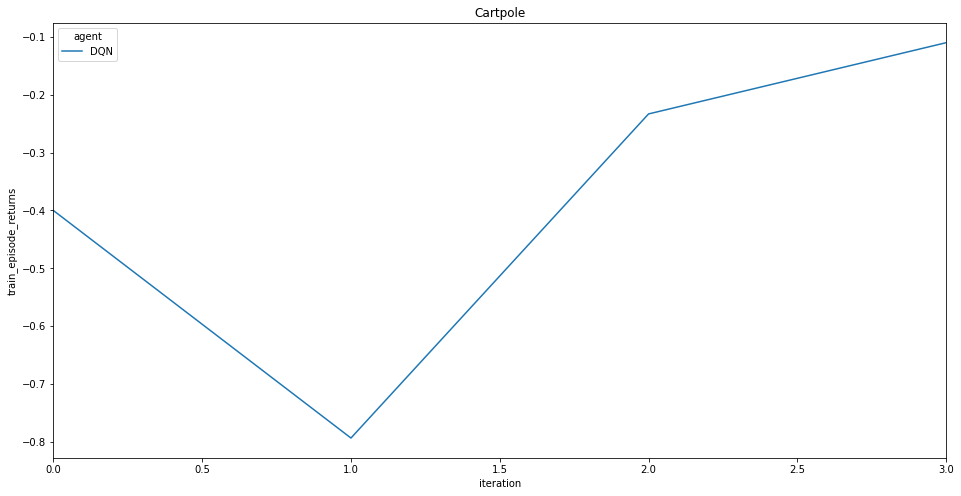

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=data, time='iteration', unit='run',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title('Cartpole')
plt.show()